In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
!scp $BABEL:seq2seq-allen/oracle_corrrnn.txt .

oracle_corrrnn.txt                            100%   43KB   3.4MB/s   00:00    


In [49]:
with open('oracle_corrrnn.txt') as f:
    data = [l.strip() for l in f]

In [50]:
def process(l):
    l = (e.strip() for e in l.split('|'))
    l = [e for e in l if e]
    l[-1:] = l[-1].split('.')[:2]
    l[:5] = list(map(float, l[:5]))
    return l

In [65]:
data = sorted(map(process, data), key=lambda x: (x[5], x[6], x[4]))

In [66]:
df = pd.DataFrame(data, columns=['p', 'r', 'f', 'map', 'n', 'corpus', 'model'])

In [92]:
set(df.corpus)

{'500N-KPCrowd', 'DUC-2001', 'Inspec', 'JPTime', 'KP20k', 'NYTime', 'WWW'}

In [93]:
abs_ = {'500N-KPCrowd': 11.2,
        'DUC-2001': 3.7,
        'Inspec': 22.4,
        'JPTime': 28.2,
        'KP20k': 42.6,
        'NYTime': 54.7,
        'WWW': 52.0}

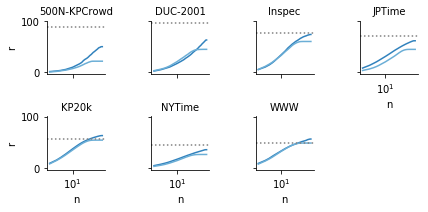

In [100]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="corpus", hue="model", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "n", "r")

for i, a in enumerate(grid.axes):
    corpus = a.title.get_text().replace('corpus = ', '')
    a.axhline(y=100 - abs_[corpus], ls=":", c=".5")
    a.title.set_text(corpus)
    a.set_xscale('log')

# Adjust the tick positions and labels


# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)

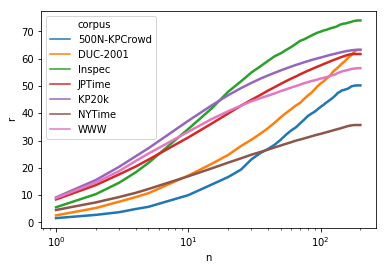

In [99]:
ax = sns.lineplot(data=df[df['model'] == 'CopyRNN'],
             hue='corpus', x='n', y='r', palette="tab10", linewidth=2.5)
ax.set_xscale('log')

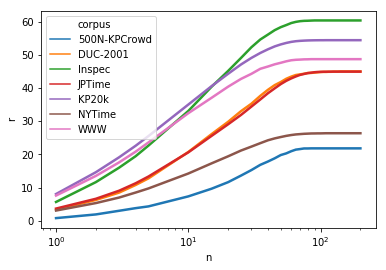

In [55]:
ax = sns.lineplot(data=df[df['model'] == 'CorrRNN'],
             hue='corpus', x='n', y='r', palette="tab10", linewidth=2.5)
ax.set_xscale('log')